In [62]:
from keras.datasets import fashion_mnist

(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

In [63]:
import pandas as pd
import tensorflow as ts
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras 
from keras import layers
from keras.models import Sequential
from keras.layers import Flatten, Dense
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Partie 1

In [64]:
type(trainX),type(trainy),type(testX),type(trainy)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [65]:
len(np.unique(trainX)),len(np.unique(trainy)),len(np.unique(testX)),len(np.unique(testy))

(256, 10, 256, 10)

In [66]:
np.count_nonzero(trainX == 0) , np.count_nonzero(trainy == 0) ,
np.count_nonzero(testX == 0) ,np.count_nonzero(testy == 0)

(3919183, 1000)

In [67]:
trainX.shape , trainy.shape , testX.shape , testy.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [68]:
np.any(trainX==0) , np.any(trainy==0) , np.any(testX==0), np.any(testy==0)

(True, True, True, True)

In [69]:
df = pd.DataFrame(trainy, columns=['Classe'])


images_par_classe = df['Classe'].value_counts().sort_index()
print("Nombre d'images par classe:")
print(images_par_classe)

Nombre d'images par classe:
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: Classe, dtype: int64


#### il y a 10 classes de chacune 6000 images 

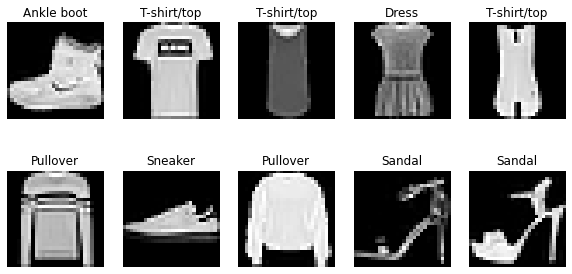

In [70]:
noms_des_classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(trainX[i], cmap='gray')
    plt.title(noms_des_classes[trainy[i]])
    plt.axis('off')

plt.show()


#### on représente les 10 premières images

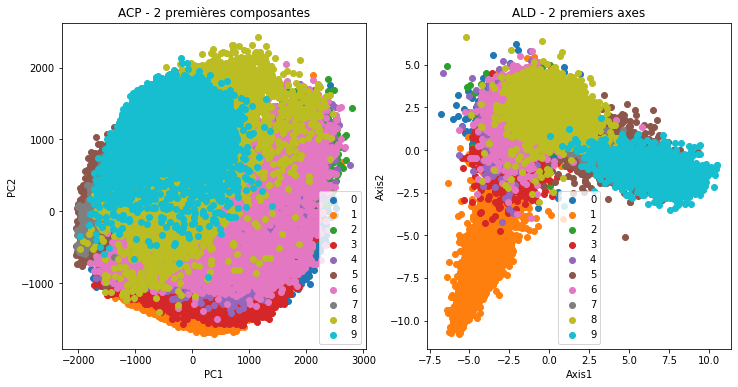

In [24]:
# Aplatir les images en vecteurs de taille 784
trainX = trainX.reshape((trainX.shape[0], -1))

# Réduire la dimension à 2 en utilisant l'ACP
pca = PCA(n_components=2)
pca_result = pca.fit_transform(trainX)

# Réduire la dimension à 2 en utilisant l'ALD
lda = LinearDiscriminantAnalysis(n_components=2)
lda_result = lda.fit_transform(trainX, trainy)

# Créer un DataFrame avec les résultats de l'ACP et de l'ALD
df_pca = pd.DataFrame(data={'PC1': pca_result[:, 0], 'PC2': pca_result[:, 1], 'Label': trainy})
df_lda = pd.DataFrame(data={'Axis1': lda_result[:, 0], 'Axis2': lda_result[:, 1], 'Label': trainy})

# Tracer le nuage de points pour l'ACP
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for label in np.unique(trainy):
    subset = df_pca[df_pca['Label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label)
plt.title('ACP - 2 premières composantes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# Tracer le nuage de points pour l'ALD
plt.subplot(1, 2, 2)
for label in np.unique(trainy):
    subset = df_lda[df_lda['Label'] == label]
    plt.scatter(subset['Axis1'], subset['Axis2'], label=label)
plt.title('ALD - 2 premiers axes')
plt.xlabel('Axis1')
plt.ylabel('Axis2')
plt.legend()

plt.show()

#### on représente les nuages de points

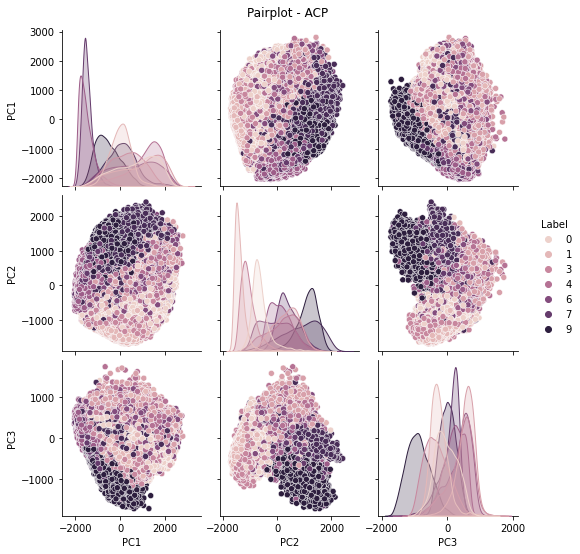

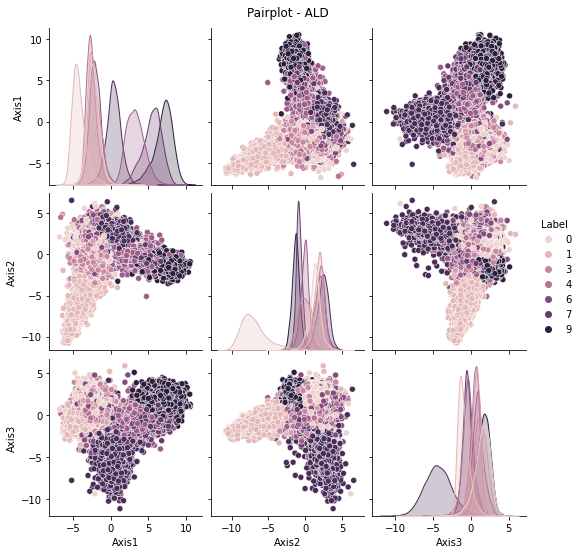

In [33]:
# Réduire la dimension à 3 en utilisant l'ACP
pca = PCA(n_components=3)
pca_result = pca.fit_transform(trainX)

# Réduire la dimension à 3 en utilisant l'ALD
lda = LinearDiscriminantAnalysis(n_components=3)
lda_result = lda.fit_transform(trainX, trainy)

# Créer un DataFrame avec les résultats de l'ACP
df_pca = pd.DataFrame(data={'PC1': pca_result[:, 0], 'PC2': pca_result[:, 1], 'PC3': pca_result[:, 2],
                            'Label': trainy})

# Créer un DataFrame avec les résultats de l'ALD
df_lda = pd.DataFrame(data={'Axis1': lda_result[:, 0], 'Axis2': lda_result[:, 1], 'Axis3': lda_result[:, 2],
                            'Label': trainy})

df_pca['Label'] = df_pca['Label'].astype(int)
df_lda['Label'] = df_lda['Label'].astype(int)

# Tracez le pairplot
sns.pairplot(df_pca, hue='Label', vars=['PC1', 'PC2', 'PC3'], diag_kind='kde')
plt.suptitle('Pairplot - ACP', y=1.02)
plt.show()

sns.pairplot(df_lda, hue='Label', vars=['Axis1', 'Axis2', 'Axis3'], diag_kind='kde')
plt.suptitle('Pairplot - ALD', y=1.02)
plt.show()


#### On représente les pairplot de l'ALD et de l'ACD

# Partie 2

In [73]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
testX = testX.reshape((testX.shape[0], -1))
trainX = trainX.reshape((trainX.shape[0], -1))


# Normaliser les valeurs des pixels à l'intervalle [0, 1]
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

# Convertir les labels en one-hot encoding
trainy = to_categorical(trainy)
testy = to_categorical(testy)

# Diviser les données en ensembles d'entraînement et de validation
trainX, valX, trainy, valy = train_test_split(trainX, trainy, test_size=0.2, random_state=42)


In [19]:
# Créer le modèle
model = Sequential()
model.add(Dense(256, input_dim=784, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

on crée un modèle de réseau dense avec 2 couches cachées et 2 autres couches dropout pour éviter le surajustement , et une couche de sortie softmax pour la classification

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 256)               200960    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [21]:
trainX.shape,trainy.shape

((48000, 784), (48000, 10))

In [22]:
# Compiler le modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# Entraîner le modèle
history = model.fit(trainX, trainy, epochs=20, batch_size=64, validation_data=(valX, valy), verbose=2)

# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(testX, testy, verbose=0)
print(f'Test accuracy: {test_acc * 100:.2f}%')

Epoch 1/20
750/750 - 11s - loss: 1.6466 - accuracy: 0.7215 - val_loss: 0.8285 - val_accuracy: 0.8048 - 11s/epoch - 15ms/step
Epoch 2/20
750/750 - 10s - loss: 0.8818 - accuracy: 0.7688 - val_loss: 0.7773 - val_accuracy: 0.7965 - 10s/epoch - 14ms/step
Epoch 3/20
750/750 - 12s - loss: 0.8602 - accuracy: 0.7704 - val_loss: 0.7472 - val_accuracy: 0.8132 - 12s/epoch - 15ms/step
Epoch 4/20
750/750 - 10s - loss: 0.8437 - accuracy: 0.7719 - val_loss: 0.7502 - val_accuracy: 0.8008 - 10s/epoch - 13ms/step
Epoch 5/20
750/750 - 10s - loss: 0.8213 - accuracy: 0.7768 - val_loss: 0.7194 - val_accuracy: 0.8112 - 10s/epoch - 13ms/step
Epoch 6/20
750/750 - 9s - loss: 0.8175 - accuracy: 0.7772 - val_loss: 0.7164 - val_accuracy: 0.8134 - 9s/epoch - 12ms/step
Epoch 7/20
750/750 - 11s - loss: 0.8093 - accuracy: 0.7778 - val_loss: 0.7389 - val_accuracy: 0.8024 - 11s/epoch - 14ms/step
Epoch 8/20
750/750 - 10s - loss: 0.8019 - accuracy: 0.7774 - val_loss: 0.6896 - val_accuracy: 0.8194 - 10s/epoch - 13ms/step
Ep

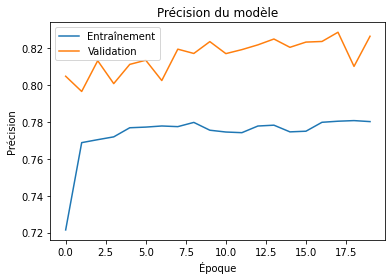

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Précision du modèle')
plt.ylabel('Précision')
plt.xlabel('Époque')
plt.legend(['Entraînement', 'Validation'], loc='upper left')
plt.show()

l'accuracy stagne à 80%

In [25]:
predX=model.predict(trainX)
type(predX) , predX.shape

(numpy.ndarray, (48000, 10))

In [42]:
from sklearn.metrics import confusion_matrix

# Convertir les probabilités prédites en classes
predicted_classes = np.argmax(predX, axis=1)
true_classes = np.argmax(trainy, axis=1)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(predicted_classes,true_classes)

# Afficher la matrice de confusion
print(conf_matrix)



[[4029    3   41  156    4    3 1057    0   16    0]
 [  16 4584   12   36   23    0   15    0    4    1]
 [  57   37 3267   25  262    0  542    0   38    0]
 [ 393  137   57 4298  235    2  246    0   36    1]
 [   9    6  970  131 3960    0  774    0   11    0]
 [  11    1    2    3    3 4368    4  159   61  113]
 [ 221   11  399  147  283    1 2049    0   64    0]
 [   0    1    0    1    0  293    0 4353   22  227]
 [  59    1   47   19   28   22   93    8 4539    0]
 [   3    0    0    0    0  100    2  321   12 4455]]


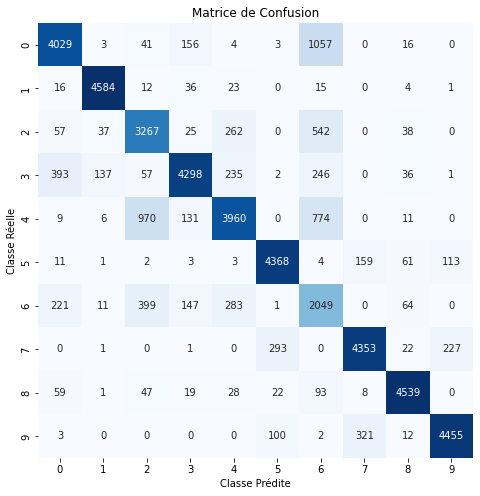

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=np.unique(true_classes), yticklabels=np.unique(true_classes))
plt.title('Matrice de Confusion')
plt.xlabel('Classe Prédite')
plt.ylabel('Classe Réelle')
plt.show()

On obtient la matrice de confusion 

# Partie 3

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import np_utils
from keras.datasets import fashion_mnist


In [71]:
# Charger les données
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Prétraitement des données
trainX = trainX.reshape(trainX.shape[0], 28, 28, 1).astype('float32')
testX = testX.reshape(testX.shape[0], 28, 28, 1).astype('float32')
trainX /= 255
testX /= 255
trainy = np_utils.to_categorical(trainy, 10)
testy = np_utils.to_categorical(testy, 10)

In [28]:
# Définir le modèle CNN
modelconv = Sequential()
modelconv.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
modelconv.add(MaxPooling2D(pool_size=(2, 2)))
modelconv.add(Flatten())
modelconv.add(Dense(128, activation='relu'))
modelconv.add(Dense(10, activation='softmax'))

# Compiler le modèle
modelconv.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle
historyconv=modelconv.fit(trainX, trainy, validation_data=(testX, testy), epochs=10, batch_size=200, verbose=2)

# Évaluer la précision du modèle sur l'ensemble de test
accuracy = modelconv.evaluate(testX, testy, verbose=0)
print("Précision du modèle sur l'ensemble de test: %.2f%%" % (accuracy[1]*100), "\%")

Epoch 1/10
300/300 - 26s - loss: 0.4997 - accuracy: 0.8254 - val_loss: 0.3878 - val_accuracy: 0.8601 - 26s/epoch - 85ms/step
Epoch 2/10
300/300 - 20s - loss: 0.3249 - accuracy: 0.8856 - val_loss: 0.3328 - val_accuracy: 0.8821 - 20s/epoch - 68ms/step
Epoch 3/10
300/300 - 16s - loss: 0.2749 - accuracy: 0.9020 - val_loss: 0.2924 - val_accuracy: 0.8944 - 16s/epoch - 54ms/step
Epoch 4/10
300/300 - 17s - loss: 0.2480 - accuracy: 0.9101 - val_loss: 0.2847 - val_accuracy: 0.8944 - 17s/epoch - 55ms/step
Epoch 5/10
300/300 - 17s - loss: 0.2262 - accuracy: 0.9184 - val_loss: 0.2685 - val_accuracy: 0.9020 - 17s/epoch - 56ms/step
Epoch 6/10
300/300 - 19s - loss: 0.2042 - accuracy: 0.9264 - val_loss: 0.2510 - val_accuracy: 0.9086 - 19s/epoch - 63ms/step
Epoch 7/10
300/300 - 25s - loss: 0.1893 - accuracy: 0.9323 - val_loss: 0.2516 - val_accuracy: 0.9066 - 25s/epoch - 83ms/step
Epoch 8/10
300/300 - 20s - loss: 0.1755 - accuracy: 0.9364 - val_loss: 0.2603 - val_accuracy: 0.9043 - 20s/epoch - 68ms/step


On crée un modèle convolutif avec une couche de convolution  3D de 32 filtres en 3x3 une couche de pooling et une dernière couche dense après avoir applatit les données

on observe que le modèle est d'ors et déjà plus efficace , et atteint 91% d'accuracy

In [30]:
modelconv.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               692352    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

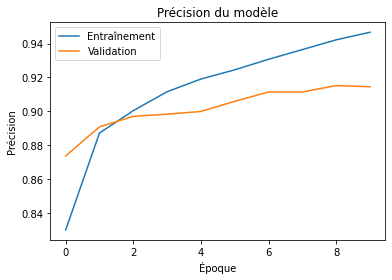

In [15]:
# Afficher les courbes d'accuracy
plt.plot(historyconv.history['accuracy'])
plt.plot(historyconv.history['val_accuracy'])
plt.title('Précision du modèle')
plt.ylabel('Précision')
plt.xlabel('Époque')
plt.legend(['Entraînement', 'Validation'], loc='upper left')
plt.show()

In [31]:
predXconv=modelconv.predict(trainX)
type(predXconv) , predXconv.shape

(numpy.ndarray, (60000, 10))

In [33]:
predicted_classes = np.argmax(predXconv, axis=1)
true_classes = np.argmax(trainy, axis=1)

# Calculer la matrice de confusion
conf_matrix_conv = confusion_matrix(predicted_classes,true_classes)

# Afficher la matrice de confusion
print(conf_matrix_conv)


[[5419    1   35   17    1    0  247    0    1    0]
 [   1 5943    1    4    1    0    2    0    0    0]
 [  60    1 5243    5   85    0  109    0    1    0]
 [  95   53   36 5817   68    0   86    0    2    0]
 [  13    2  331  114 5648    0  160    0    6    0]
 [   0    0    0    0    0 5955    0    2    0    1]
 [ 403    0  354   42  196    0 5387    0    3    0]
 [   0    0    0    0    0   34    0 5913    0   83]
 [   9    0    0    1    1    0    9    1 5987    0]
 [   0    0    0    0    0   11    0   84    0 5916]]


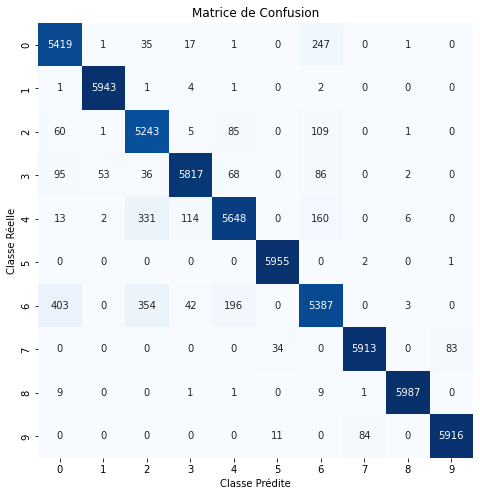

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_conv, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=np.unique(true_classes), yticklabels=np.unique(true_classes))
plt.title('Matrice de Confusion')
plt.xlabel('Classe Prédite')
plt.ylabel('Classe Réelle')
plt.show()

In [45]:
whos

Variable                       Type          Data/Info
------------------------------------------------------
Conv2D                         type          <class 'keras.layers.convolutional.Conv2D'>
Dense                          type          <class 'keras.layers.core.dense.Dense'>
Dropout                        type          <class 'keras.layers.core.dropout.Dropout'>
Flatten                        type          <class 'keras.layers.core.flatten.Flatten'>
LinearDiscriminantAnalysis     type          <class 'sklearn.discrimin<...>earDiscriminantAnalysis'>
MaxPooling2D                   type          <class 'keras.layers.pooling.MaxPooling2D'>
PCA                            ABCMeta       <class 'sklearn.decomposition._pca.PCA'>
Sequential                     type          <class 'keras.engine.sequential.Sequential'>
accuracy                       list          n=2
conf_matrix                    ndarray       10x10: 100 elems, type `int64`, 800 bytes
conf_matrix_conv               ndarr

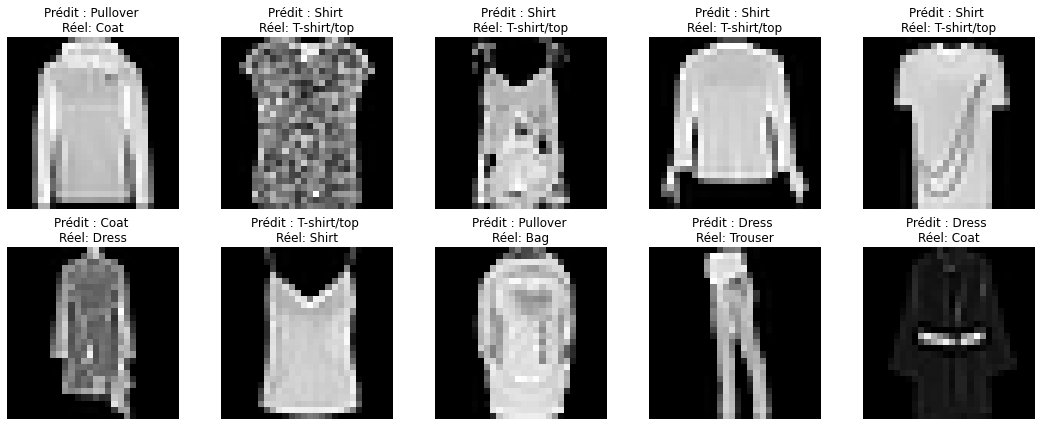

In [72]:
# Convertir les probabilités prédites en classes
predicted_classes = np.argmax(predXconv, axis=1)
true_classes = np.argmax(trainy, axis=1)

# Trouver les indices des mauvaises prédictions
misclassified_indices = np.where(predicted_classes != true_classes)[0]

# Afficher les premières 10 mauvaises prédictions
num_misclassified_to_display = min(10, len(misclassified_indices))

plt.figure(figsize=(15, 6))
for i in range(num_misclassified_to_display):
    plt.subplot(2, 5, i + 1)
    plt.imshow(trainX[misclassified_indices[i]].reshape(28, 28), cmap='gray')
    plt.title(f"Prédit : {noms_des_classes[predicted_classes[misclassified_indices[i]]]} \nRéel: {noms_des_classes[true_classes[misclassified_indices[i]]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

on affiche les classes non prédites

# Conclusion

La problématique de ce TP résidait avant tout dans le format des données de départ. En effet , nous avions des images , dont les caractéristiques se traduisent numériquement en matrices 28x28.
A ce stade , deux solutions d'offrent à nous : applatir les données et essayer des modèles classiques ou les laisser de la sorte et proposer des modèles dits convolutifs.
On remarque que les modèles convolutifs sont par nature plus efficaces car mieux adaptés à ce type de données, l'accuracy étant nettement meilleur pendant l'entraînement .